In [1]:
import pandas as pd

In [2]:
# Завантажимо дані з файлів CSV
tsla_data = pd.read_csv("TSLA.csv")
btc_data = pd.read_csv("BTC-USD.csv")

In [3]:
# Перетворимо колонки дат у формат datetime (зазвичай це колонка 'Date')
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [4]:
# Знайдемо останню дату в даних
last_date_tsla = tsla_data['Date'].max()
last_date_btc = btc_data['Date'].max()

In [5]:
# Відсіємо останні два місяці
cutoff_tsla = last_date_tsla - pd.DateOffset(months=2)
cutoff_btc = last_date_btc - pd.DateOffset(months=2)

filtered_tsla = tsla_data[tsla_data['Date'] < cutoff_tsla]
filtered_btc = btc_data[btc_data['Date'] < cutoff_btc]


In [7]:
# Перевіримо результати
print(filtered_tsla.tail())
print(filtered_btc.tail())

          Date        Open        High         Low       Close      Volume
656 2024-10-18  220.710007  222.279999  219.229996  220.699997  49611900.0
657 2024-10-19         NaN         NaN         NaN         NaN         NaN
658 2024-10-20         NaN         NaN         NaN         NaN         NaN
659 2024-10-21  218.899994  220.479996  215.729996  218.850006  47329000.0
660 2024-10-22  217.309998  218.220001  215.259995  217.970001  43268700.0
          Date          Open          High           Low         Close  \
656 2024-10-18  67419.109375  68969.750000  67177.820312  68418.789062   
657 2024-10-19  68418.976562  68668.007812  68024.640625  68362.734375   
658 2024-10-20  68364.179688  69359.007812  68105.718750  69001.703125   
659 2024-10-21  69002.000000  69462.734375  66829.851562  67367.851562   
660 2024-10-22  67360.703125  67801.578125  66581.367188  67361.406250   

          Volume  
656  36857165014  
657  14443497908  
658  18975847518  
659  37498611780  
660  31808

In [9]:
from prophet import Prophet

In [10]:
# Підготовка даних для TSLA
df_tsla = filtered_tsla[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

# Підготовка даних для BTC
df_btc = filtered_btc[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

In [11]:
# Ініціалізація моделей
model_tsla = Prophet()
model_btc = Prophet()

In [12]:
# Тренування моделей
model_tsla.fit(df_tsla)
model_btc.fit(df_btc)

19:23:37 - cmdstanpy - INFO - Chain [1] start processing
19:23:37 - cmdstanpy - INFO - Chain [1] done processing
19:23:37 - cmdstanpy - INFO - Chain [1] start processing
19:23:37 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Створення майбутніх датафреймів на місяць вперед
future_tsla = model_tsla.make_future_dataframe(periods=30)
future_btc = model_btc.make_future_dataframe(periods=30)

In [14]:
# Прогнозування
forecast_tsla = model_tsla.predict(future_tsla)
forecast_btc = model_btc.predict(future_btc)

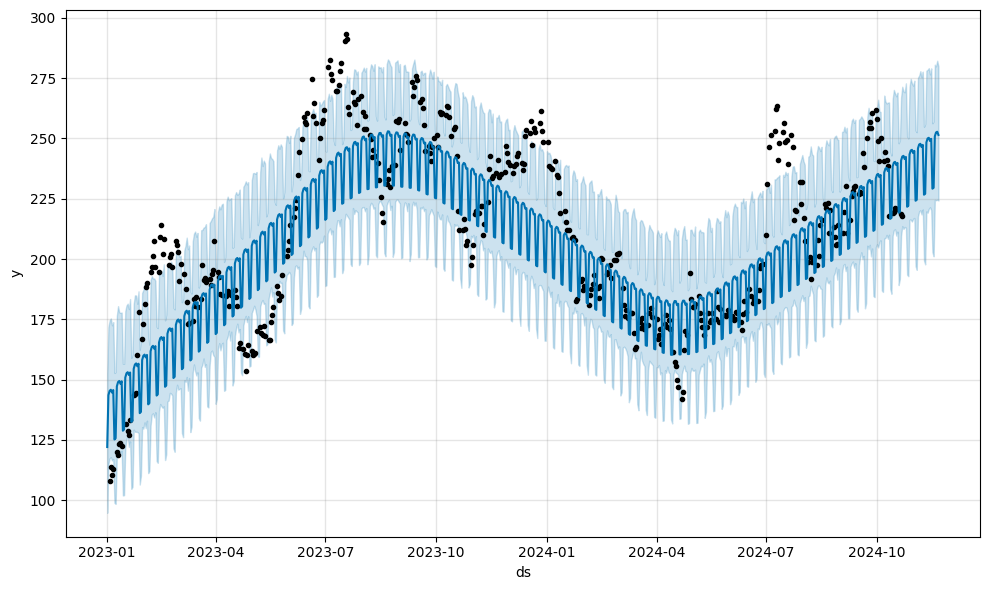

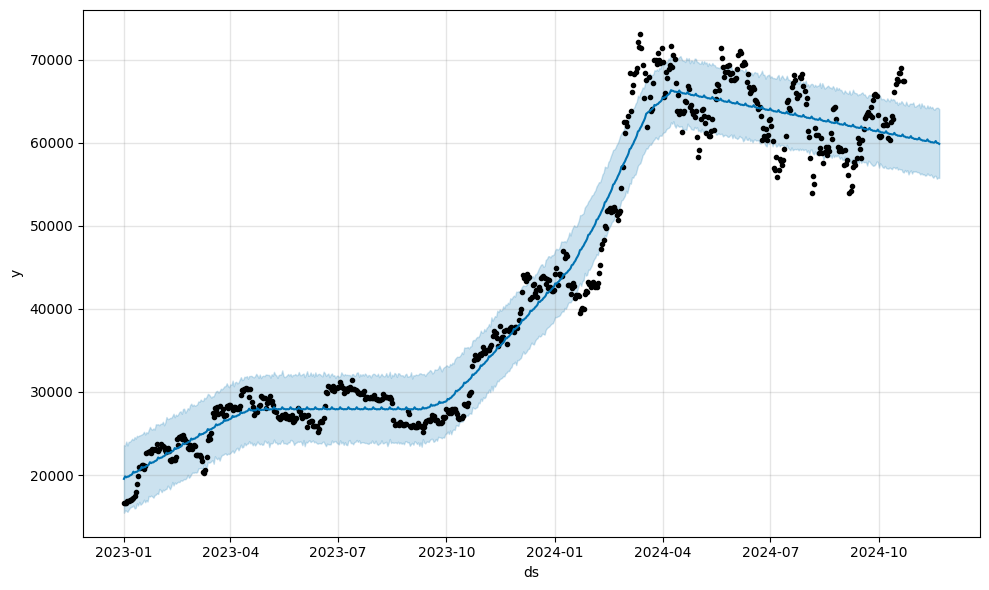

In [15]:
# Побудуємо графіки прогнозів
model_tsla.plot(forecast_tsla).savefig("tsla_forecast.png")
model_btc.plot(forecast_btc).savefig("btc_forecast.png")

In [16]:
# Збережемо прогноз Tesla у файл
forecast_tsla[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("tsla_forecast.csv", index=False)

# Збережемо прогноз Bitcoin у файл
forecast_btc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("btc_forecast.csv", index=False)